In [12]:

import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)

In [13]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

sess = tf.InteractiveSession()

mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


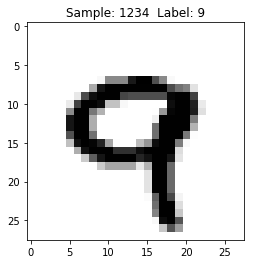

In [16]:
%matplotlib inline

import matplotlib.pyplot as plt

def display_sample(num):
    #Printing the one-hot array of this sample's label 
    print(mnist.train.labels[num])  
    #Printing the label converted back to a number
    label = mnist.train.labels[num].argmax(axis=0)
    #Reshaping the 768 values to a 28x28 image
    image = mnist.train.images[num].reshape([28,28])
    plt.title('Sample: %d  Label: %d' % (num, label))
    plt.imshow(image, cmap=plt.get_cmap('gray_r'))
    plt.show()
    
display_sample(1234)

The "one_hot" representation of the number for image 1234 of trainig data set.
This image represents in the array that was printed out from the training label for image# 1234.

Now, flattening each image to a 1D array of 784 (28 x 28) numerical values. Each one of those values will be an input node into the deep neural network. Let's visualize how the data is being fed into it just to drive that point home

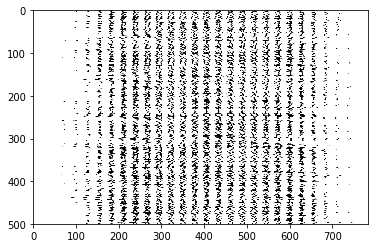

In [17]:
import numpy as np

images = mnist.train.images[0].reshape([1,784])
for i in range(1, 500):
    images = np.concatenate((images, mnist.train.images[i].reshape([1,784])))
plt.imshow(images, cmap=plt.get_cmap('gray_r'))
plt.show()

In [18]:
input_images = tf.placeholder(tf.float32, shape=[None, 784])
target_labels = tf.placeholder(tf.float32, shape=[None, 10])

In [19]:
hidden_nodes = 512

input_weights = tf.Variable(tf.truncated_normal([784, hidden_nodes]))
input_biases = tf.Variable(tf.zeros([hidden_nodes]))

hidden_weights = tf.Variable(tf.truncated_normal([hidden_nodes, 10]))
hidden_biases = tf.Variable(tf.zeros([10]))

In [21]:
input_layer = tf.matmul(input_images, input_weights)
hidden_layer = tf.nn.relu(input_layer + input_biases)
digit_weights = tf.matmul(hidden_layer, hidden_weights) + hidden_biases

In [22]:
loss_function = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=digit_weights, labels=target_labels))

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See @{tf.nn.softmax_cross_entropy_with_logits_v2}.



In [23]:
optimizer = tf.train.GradientDescentOptimizer(0.5).minimize(loss_function)

In [24]:
correct_prediction = tf.equal(tf.argmax(digit_weights,1), tf.argmax(target_labels,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [26]:
tf.global_variables_initializer().run()

for x in range(2000):
    batch = mnist.train.next_batch(100)
    optimizer.run(feed_dict={input_images: batch[0], target_labels: batch[1]})
    if ((x+1) % 100 == 0):
        print("Training epoch " + str(x+1))
        print("Accuracy: " + str(accuracy.eval(feed_dict={input_images: mnist.test.images, target_labels: mnist.test.labels})))

Training epoch 100
Accuracy: 0.8388
Training epoch 200
Accuracy: 0.8632
Training epoch 300
Accuracy: 0.8738
Training epoch 400
Accuracy: 0.8864
Training epoch 500
Accuracy: 0.8904
Training epoch 600
Accuracy: 0.8978
Training epoch 700
Accuracy: 0.9031
Training epoch 800
Accuracy: 0.9056
Training epoch 900
Accuracy: 0.9093
Training epoch 1000
Accuracy: 0.9139
Training epoch 1100
Accuracy: 0.9135
Training epoch 1200
Accuracy: 0.9172
Training epoch 1300
Accuracy: 0.9173
Training epoch 1400
Accuracy: 0.9249
Training epoch 1500
Accuracy: 0.9227
Training epoch 1600
Accuracy: 0.924
Training epoch 1700
Accuracy: 0.9238
Training epoch 1800
Accuracy: 0.9299
Training epoch 1900
Accuracy: 0.9306
Training epoch 2000
Accuracy: 0.9298



Printing some of the misclassified images . We'll go through the first 100 test images and look at the ones that are misclassified:


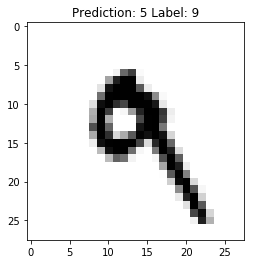

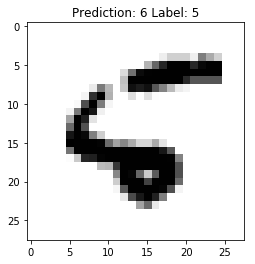

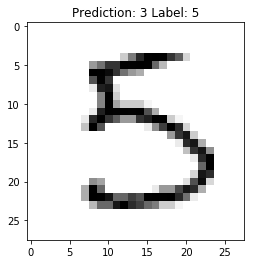

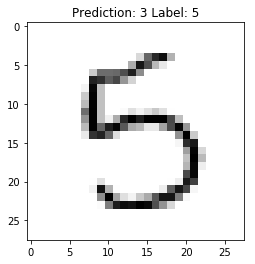

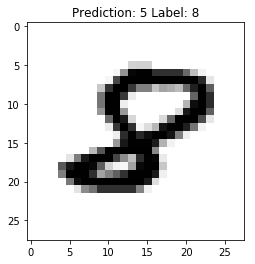

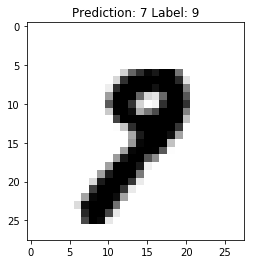

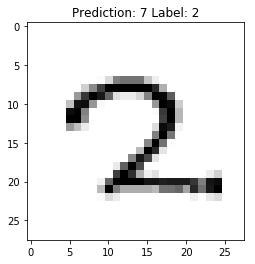

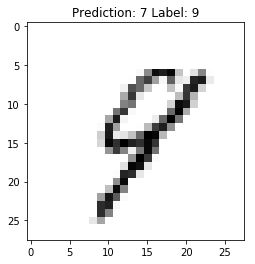

In [27]:
for x in range(100):
    # Loading a single test image and its label
    x_train = mnist.test.images[x,:].reshape(1,784)
    y_train = mnist.test.labels[x,:]
    # Converting the one-hot label to an integer
    label = y_train.argmax()
    # Getting the classification from our neural network's digit_weights final layer, and convert it to an integer
    prediction = sess.run(digit_weights, feed_dict={input_images: x_train}).argmax()
    # If the prediction does not match the correct label, display it
    if (prediction != label) :
        plt.title('Prediction: %d Label: %d' % (prediction, label))
        plt.imshow(x_train.reshape([28,28]), cmap=plt.get_cmap('gray_r'))
        plt.show()